# Gasoline dataset

We received an Excel file containing diesel and gasoline consumpltions in various cities of California. 

We load the data and have a first look at the contents of the dataset. We begin with the tab containing the gasoline data:

In [18]:
import pandas

data = pandas.read_excel("C:/Users/abazh/Desktop/A15 Gasoline & Diesel sales by City (FINAL).xlsx", sheet_name = "Gasoline (FINAL)", skiprows = 1)

data.head(10)

,CITY,Total Gasoline Sales,Total Stations Reported,Total Gasoline Sales.1,Total Stations Reported.1,Total Gasoline Sales.2,Total Stations Reported.2,Total Gasoline Sales.3,Total Stations Reported.3,Total Gasoline Sales.4,...,Total Gasoline Sales.5,Total Stations Reported.5,Total Gasoline Sales.6,Total Stations Reported.6,Total Gasoline Sales.7,Total Stations Reported.7,Total Gasoline Sales.8,Total Stations Reported.8,Total Gasoline Sales.9,Total Stations Reported.9
0,LOS ANGELES,586347563,313,541669074,297,572692004,308,564407957,316,512173854,...,458990063,242,489927305,272,577624448,327,602357350,322,553325286,315
1,SAN DIEGO,440144265,231,424245610,218,434596024,235,417736626,230,350797122,...,382951006,204,429738409,219,458149963,243,471779602,241,459943754,240
2,SAN JOSE,292522195,171,260104229,157,297914621,168,291316014,161,280877950,...,218224534,121,286512916,145,324059453,170,318609135,167,298578643,158
3,SACRAMENTO,238010548,166,238196308,159,259346538,170,259915107,167,260505042,...,165447962,110,255968575,153,278560889,171,280524058,169,264019029,165
4,BAKERSFIELD,190085433,163,190670544,148,193056764,148,192219231,156,194409311,...,163316546,120,181022100,128,221473122,158,216668139,161,204619282,155
5,FRESNO,161532883,140,157720976,131,165909908,141,168649092,148,157373389,...,121137057,103,153759361,117,184727100,147,193446892,146,192385181,145
6,RIVERSIDE,111827426,62,117944986,61,119783639,62,119021979,68,120248325,...,107917738,57,127251421,66,146745932,76,146802350,74,155558036,80
7,LONG BEACH,134024871,77,127551070,75,122830489,74,133577640,77,118206401,...,117687506,68,120041337,72,129629841,81,130015569,78,126595389,80
8,ANAHEIM,129172807,63,125902349,62,121960880,62,127430894,62,105464046,...,95372914,46,114603756,60,136457019,70,138801314,68,128541952,66
9,SAN FRANCISCO,135930554,85,111721811,83,129239805,81,127449219,82,124027597,...,70580167,51,106580467,66,119731046,78,119659396,77,104608929,67


There are 21 columns present; one column containing city names and 20 columns, in 10 pairs, containg gasoline sales (in USD?) and number of reporting gas stations. These span 10 years from 2009 to 2018. 

In [19]:
data.shape

(352, 21)

The total number of cities present in the dataset is 352.

We now pick Los Angeles and we plot the gas consumption per year as well as the number of reporting stations:

In [20]:
gasNames = ["Total Gasoline Sales"]
for i in range(1,10):
    name = gasNames[0] + "." + repr(i)
    gasNames.append(name)
    
stationNames = ["Total Stations Reported"]
for i in range(1,10):
    name = stationNames[0] + "." + repr(i)
    stationNames.append(name)
   
LAgas = data.iloc[0][gasNames].copy().values.astype("int")
LAstation = data.iloc[0][stationNames].copy().values.astype("int")

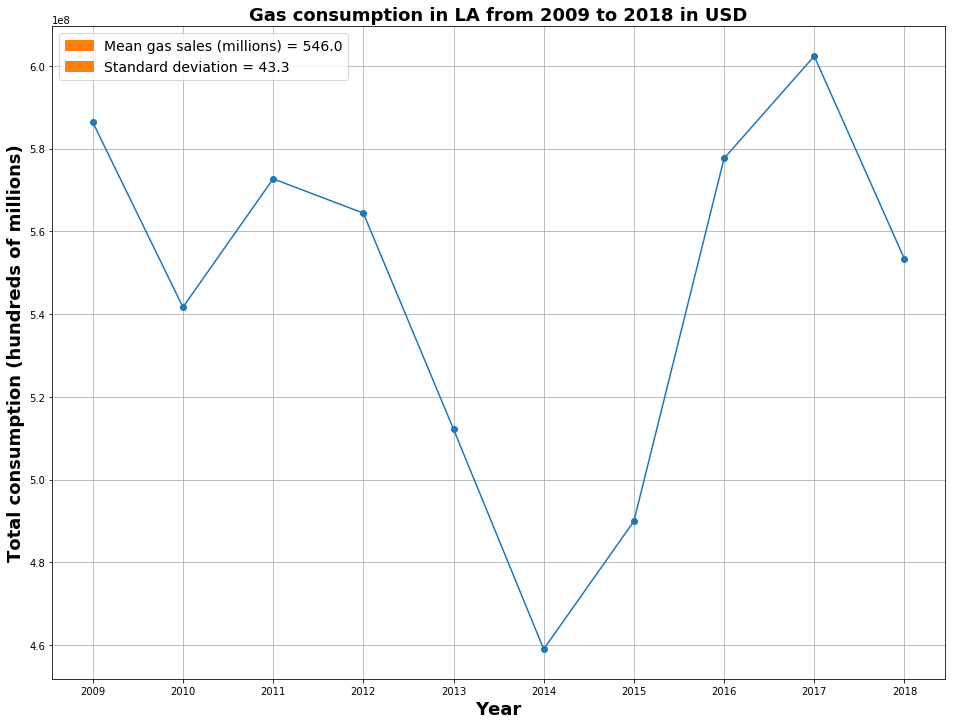

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy

fig = plt.figure(figsize=(16,12))
plt.plot(LAgas, color = "#1f77b4", linestyle = "solid", marker = ".", markersize = 12)
plt.grid(True)
plt.xlabel("Year",fontsize = 18, fontweight='bold')
pos = [0,1,2,3,4,5,6,7,8,9]
years = ["2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]
plt.xticks(pos, years)
plt.ylabel("Total consumption (hundreds of millions)", fontsize = 18, fontweight='bold')
plt.title("Gas consumption in LA from 2009 to 2018 in USD",fontsize = 18, fontweight='bold')
orange = mpatches.Patch(color="#ff7f0e", label='Mean gas sales (millions) = ' + '{:.1f}'.format(numpy.mean(LAgas) / 1000000))
red = mpatches.Patch(color='#ff7f0e', label="Standard deviation = " + '{:.1f}'.format(numpy.std(LAgas) / 1000000))
plt.legend(handles=[orange,red],loc=0,fontsize=14)
plt.show(fig)

And for the number of reporting stations:

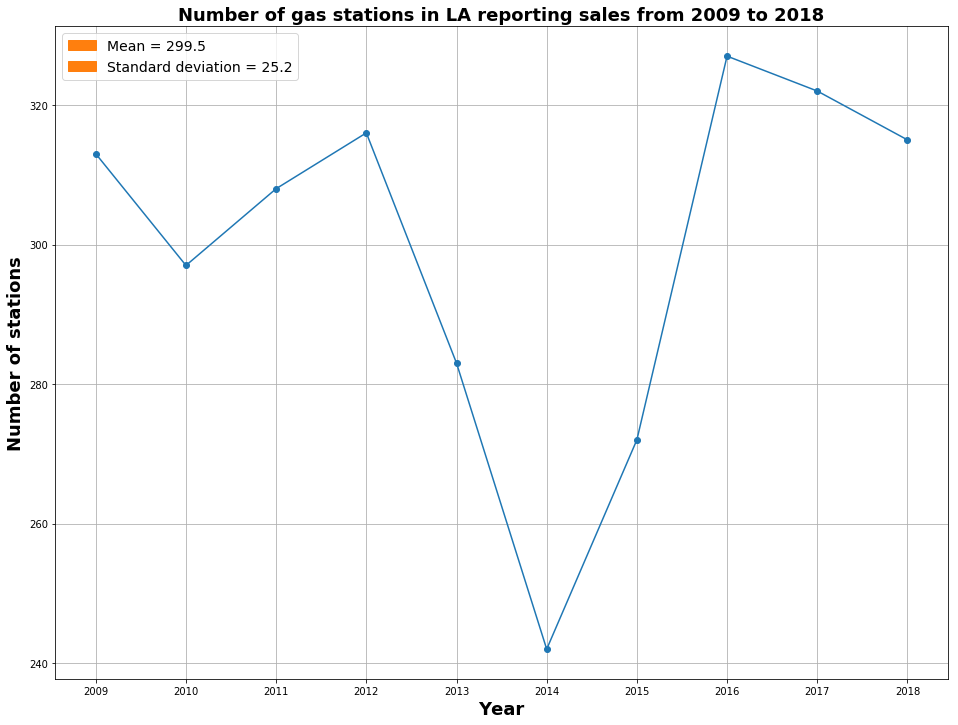

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy

fig = plt.figure(figsize=(16,12))
plt.plot(LAstation, color = "#1f77b4", linestyle = "solid", marker = ".", markersize = 12)
plt.grid(True)
plt.xlabel("Year",fontsize = 18, fontweight='bold')
pos = [0,1,2,3,4,5,6,7,8,9]
years = ["2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]
plt.xticks(pos, years)
plt.ylabel("Number of stations", fontsize = 18, fontweight='bold')
plt.title("Number of gas stations in LA reporting sales from 2009 to 2018",fontsize = 18, fontweight='bold')
orange = mpatches.Patch(color="#ff7f0e", label='Mean = ' + '{:.1f}'.format(numpy.mean(LAstation)))
red = mpatches.Patch(color='#ff7f0e', label="Standard deviation = " + '{:.1f}'.format(numpy.std(LAstation)))
plt.legend(handles=[orange,red],loc=0,fontsize=14)
plt.show(fig)

It is striking the similarity of the above two plots in terms of shape. It seems that the total gas sales are heavily influenced by the actual number of stations reporting their sales. 

We now formally check this idea by fitting a simple linear model trying to predict gas sales (outcome) from the number of reporting stations (predictor): 

In [23]:
import statsmodels.api as sm

X = LAstation
y = LAgas
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(disp=0)
predictions = model.predict(X)

model.summary()

C:\Users\abazh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     81.68
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           1.80e-05
Time:                        05:06:50   Log-Likelihood:                -177.95
No. Observations:                  10   AIC:                             359.9
Df Residuals:                       8   BIC:                             360.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.51e+07   5.45e+07      1.011      0.342   -7.06e+07    1.81e+08
x1          1.639e+06   1.81e+05      9.038      0.000    1.22e+06    2.06e+06
==============================================================================
Omnibus:                        2.252   Durbin-Watson:                   2.387
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                0.937
Skew:                           0.254   Prob(JB):                        0.626
Kurtosis:                       1.589   Cond. No.                     3.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Indeed, it is evident from the above simple linear model (sales ~ const + stations) that the number of reporting stations is highly predictive of the gas comsumption. The predistor is statistically significant (p-value = 0, below 5%) and it explains 90% of the variance present in the gas sales (adj. R-squared = 0.900).

The warning about multi-colinearity should not concern us as it is somewhat expected with only 10 data points present and some of the values close enough.

Having explored one dimension of the data (row-wise), we now turn our attention to the a column-wise analysis. We pick a year, e.g. 2018, and we plot gas consumption and number of reporting stations per city.

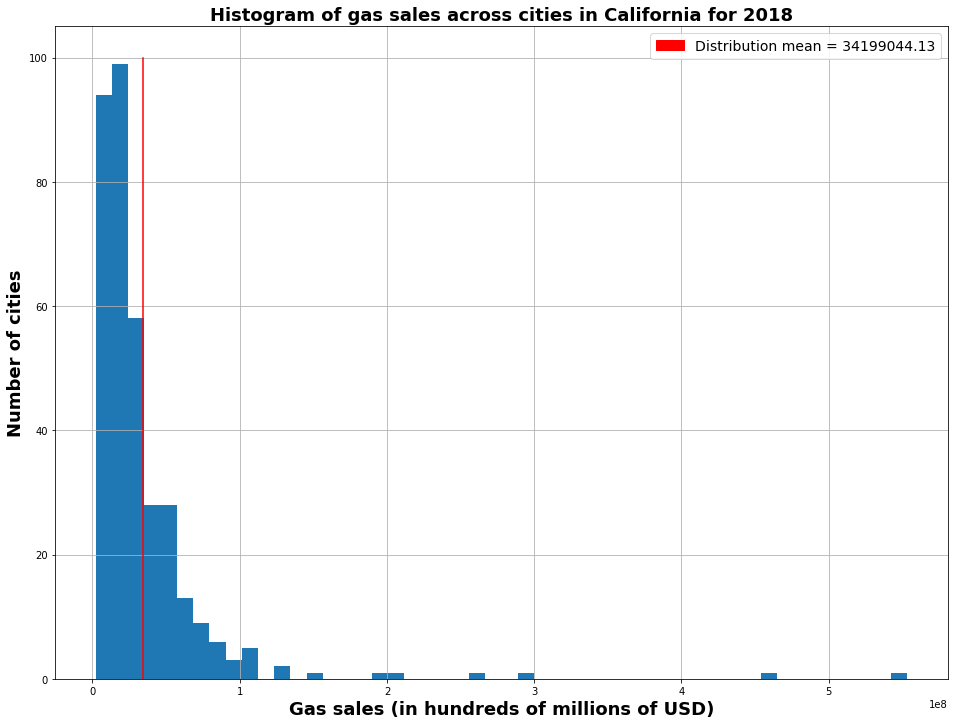

In [24]:
gas2018 = data["Total Gasoline Sales.9"].copy().values
station2018 = data["Total Stations Reported.9"].copy().values

gas2018mean = numpy.mean(gas2018)
station2018mean = numpy.mean(station2018)

gas2018std = numpy.std(gas2018)
station2018std = numpy.std(station2018)


fig = plt.figure(figsize=(16,12))
plt.hist(gas2018, 50, color = "#1f77b4")
plt.grid(True)
plt.plot([gas2018mean,gas2018mean],[0,100], color = "red")
plt.xlabel("Gas sales (in hundreds of millions of USD)",fontsize = 18, fontweight='bold')
plt.ylabel("Number of cities", fontsize = 18, fontweight='bold')
plt.title("Histogram of gas sales across cities in California for 2018",fontsize = 18, fontweight='bold')
red = mpatches.Patch(color='red', label="Distribution mean = " + '{:.2f}'.format(gas2018mean))
plt.legend(handles=[red],loc=0,fontsize=14)
plt.show(fig)

By looking att the distribution of gas sales we can clearly identify a few outlier cities which have extremely high gas consumption (above 180M USD). Let's pinpoint them:

In [25]:
outlierIndex = numpy.where(data["Total Gasoline Sales.9"].values.astype("int") > 180000000)[0]
data["CITY"].iloc[outlierIndex]

0    LOS ANGELES
1      SAN DIEGO
2       SAN JOSE
3     SACRAMENTO
4    BAKERSFIELD
5         FRESNO
Name: CITY, dtype: object

These cities also correspond to the largest cities of California by population although the absence of San Francisco is notable.

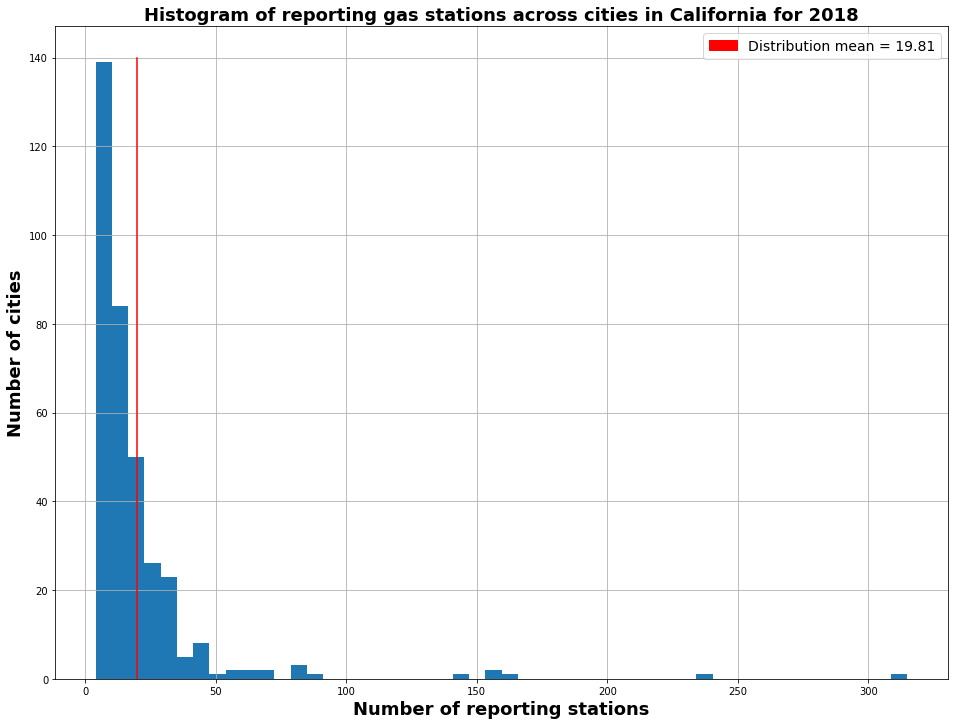

In [26]:
fig = plt.figure(figsize=(16,12))
plt.hist(station2018, 50, color = "#1f77b4")
plt.grid(True)
plt.plot([station2018mean,station2018mean],[0,140], color = "red")
plt.xlabel("Number of reporting stations",fontsize = 18, fontweight='bold')
plt.ylabel("Number of cities", fontsize = 18, fontweight='bold')
plt.title("Histogram of reporting gas stations across cities in California for 2018",fontsize = 18, fontweight='bold')
red = mpatches.Patch(color='red', label="Distribution mean = " + '{:.2f}'.format(station2018mean))
plt.legend(handles=[red],loc=0,fontsize=14)
plt.show(fig)

The two distributions have similar shapes. Most of the cities have small number of gas stations and gas consumptions. 

We now fit again a simple linear model trying to predict gas sales (outcome) from the number of reporting stations (predictor) for 2018:  

In [27]:
X = station2018
y = gas2018
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(disp=0)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     5630.
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          8.60e-218
Time:                        05:06:51   Log-Likelihood:                -6231.3
No. Observations:                 352   AIC:                         1.247e+04
Df Residuals:                     350   BIC:                         1.247e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.874e+05   7.74e+05      0.759      0.448   -9.34e+05    2.11e+06
x1          1.697e+06   2.26e+04     75.032      0.000    1.65e+06    1.74e+06
==============================================================================
Omnibus:                       72.110   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.359
Skew:                          -0.592   Prob(JB):                    1.54e-121
Kurtosis:                       9.044   Cond. No.                         42.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The number of gas stations per city is again statistically significant (p-value = 0) and explains a huge amount of variance (adj. R-squared = 0.941). The above results are somewhat expected of course since the number of gas stations per city is a mediator for city population and thus gross gas consumption per city.

We now check the average number of reporting stations per year in order to identify any huge fluctuations:

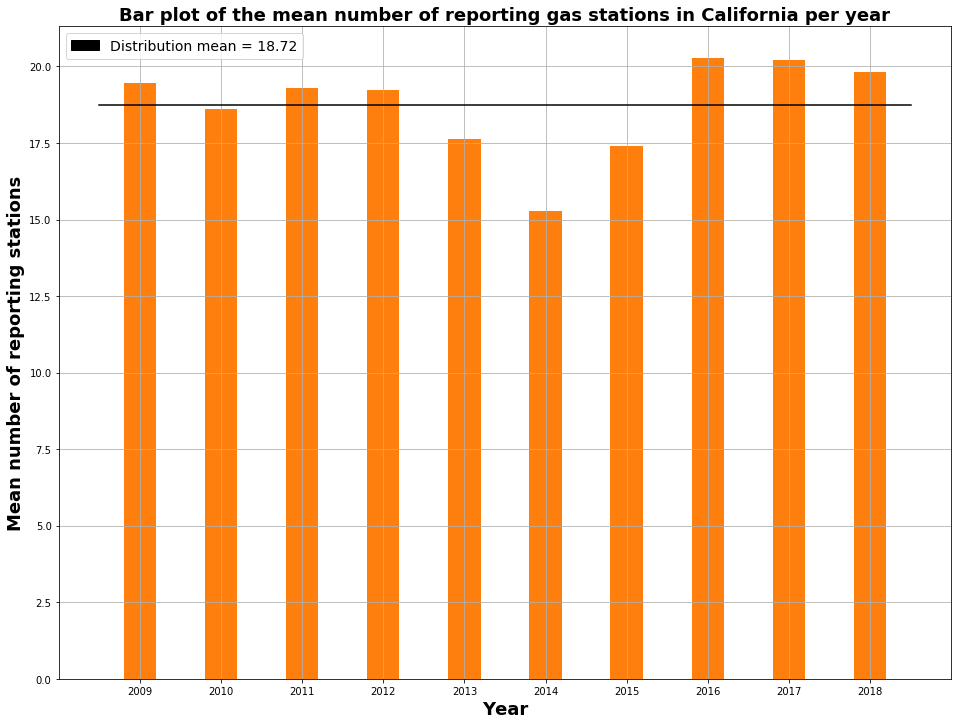

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy

meanGasReport = []

for i in range(len(stationNames)):
    meanGasReport.append(numpy.nanmean(data[stationNames[i]]))

grossMean = numpy.mean(meanGasReport) 
pos = [0,2,4,6,8,10,12,14,16,18]
years = ["2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]

fig = plt.figure(figsize=(16,12))
plt.bar(pos,meanGasReport, color = "#ff7f0e")
plt.grid(True)
plt.plot([-1,19],[grossMean,grossMean], color = "black")
plt.xticks(pos, years)
plt.xlabel("Year",fontsize = 18, fontweight='bold')
plt.ylabel("Mean number of reporting stations", fontsize = 18, fontweight='bold')
plt.title("Bar plot of the mean number of reporting gas stations in California per year",fontsize = 18, fontweight='bold')
red = mpatches.Patch(color='black', label="Distribution mean = " + '{:.2f}'.format(grossMean))
plt.legend(handles=[red],loc=0,fontsize=14)
#plt.savefig("C:/Users/abazh/Desktop/meanReporting.png", dpu=300)
plt.show(fig)

It looks like year 2014 suffers from a severe under-reporting effect (-20%). Years 2013 and 2015 have lower-than-average reporting but within a bearable margin (appr. 6.5%). We might need to exclude year 2014 all together.

# EV charging and Census data

We now enhance our analysis with some additional data concerning city population, per capita income and EV charging.

We first explore the relationship between city population and number of gas stations/gas sales:

In [138]:
dataExtra = pandas.read_excel("C:/Users/abazh/Desktop/191108 A15 Gas Sales by City (2).xlsx", sheet_name = "Sheet2")
dataExtra.head(10)

,CITY,2014,2015,2016,2017,2018,EVSE Level 2,EV DC Fast,Population,Per Capita Income,Travel Time to Work
0,LOS ANGELES,458990063.0,489927305.0,577624448.0,602357350.0,553325286.0,2679.0,83.0,3990456,31563,30.9
1,SAN DIEGO,382951006.0,429738409.0,458149963.0,471779602.0,459943754.0,1416.0,129.0,1425976,37112,24
2,SAN JOSE,218224534.0,286512916.0,324059453.0,318609135.0,298578643.0,801.0,117.0,1030119,40275,29.4
3,SACRAMENTO,165447962.0,255968575.0,278560889.0,280524058.0,264019029.0,505.0,94.0,508529,28671,25.4
4,BAKERSFIELD,163316546.0,181022100.0,221473122.0,216668139.0,204619282.0,36.0,20.0,383579,25044,22.6
5,FRESNO,121137057.0,153759361.0,184727100.0,193446892.0,192385181.0,186.0,25.0,530093,21286,21.6
6,RIVERSIDE,107917738.0,127251421.0,146745932.0,146802350.0,155558036.0,161.0,34.0,330063,23865,30.4
7,LONG BEACH,117687506.0,120041337.0,129629841.0,130015569.0,126595389.0,236.0,4.0,467354,29586,30.4
8,ANAHEIM,95372914.0,114603756.0,136457019.0,138801314.0,128541952.0,265.0,30.0,352005,26185,28.5
9,SAN FRANCISCO,70580167.0,106580467.0,119731046.0,119659396.0,104608929.0,814.0,28.0,883305,59508,32.8


There seems to be an error in the data entry of West Hollywood (population of 35, per capita income of 16.5) as well as for El Sobrante and South Lake Tahoe, thus we exclude these rows:

In [113]:
dataExtra.iloc[[300,301,302]]

,CITY,2014,2015,2016,2017,2018,EVSE Level 2,EV DC Fast,Population,Per Capita Income,Travel Time to Work
300,EL SOBRANTE,8110261.0,9351135.0,10926447.0,10624574.0,9124494.0,0.0,0.0,x,22036,36854
301,SOUTH LAKE TAHOE,6265551.0,10933606.0,12072636.0,12639400.0,9828461.0,26.0,3.0,35342,28098,64275
302,WEST HOLLYWOOD,8118108.0,7584393.0,9332650.0,10188735.0,6284152.0,89.0,0.0,35.9,16.5,27.5


In [139]:
import scipy

dataExtra = dataExtra.drop(labels = [300,301,302],axis=0)
dataAll = data.merge(dataExtra, on = ["CITY"])
index = numpy.where(dataAll["Population"] == "x")[0]
dataAll = dataAll.drop(labels = index, axis = 0)

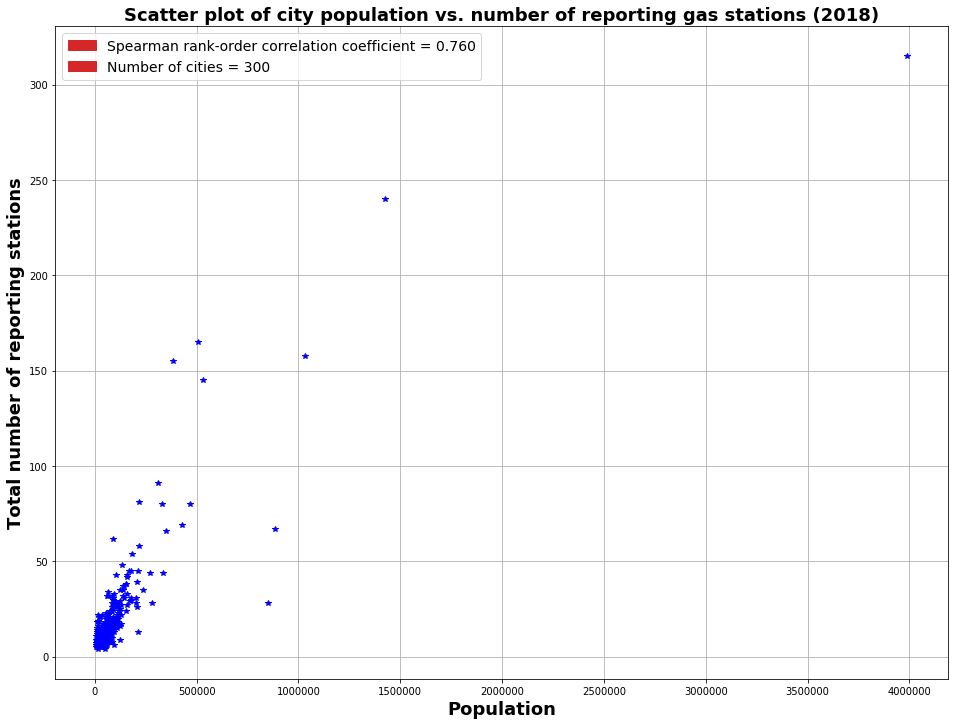

In [115]:
fig = plt.figure(figsize=(16,12))
plt.plot(dataAll["Population"].astype("int"),dataAll["Total Stations Reported.9"], "b*")
plt.grid(True)
plt.xlabel("Population",fontsize = 18, fontweight='bold')
plt.ylabel("Total number of reporting stations", fontsize = 18, fontweight='bold')
plt.title("Scatter plot of city population vs. number of reporting gas stations (2018)",fontsize = 18, fontweight='bold')
red1 = mpatches.Patch(color='#d62728', label="Spearman rank-order correlation coefficient = " + '{:.3f}'.format(scipy.stats.spearmanr(dataAll["Population"].astype("int"),dataAll["Total Stations Reported.9"])[0]))
red2 = mpatches.Patch(color='#d62728', label="Number of cities = " + repr(dataAll.shape[0])) 
plt.legend(handles=[red1,red2],loc=0,fontsize=14)
#plt.savefig("C:/Users/abazh/Desktop/meanReporting.png", dpu=300)
plt.show(fig)

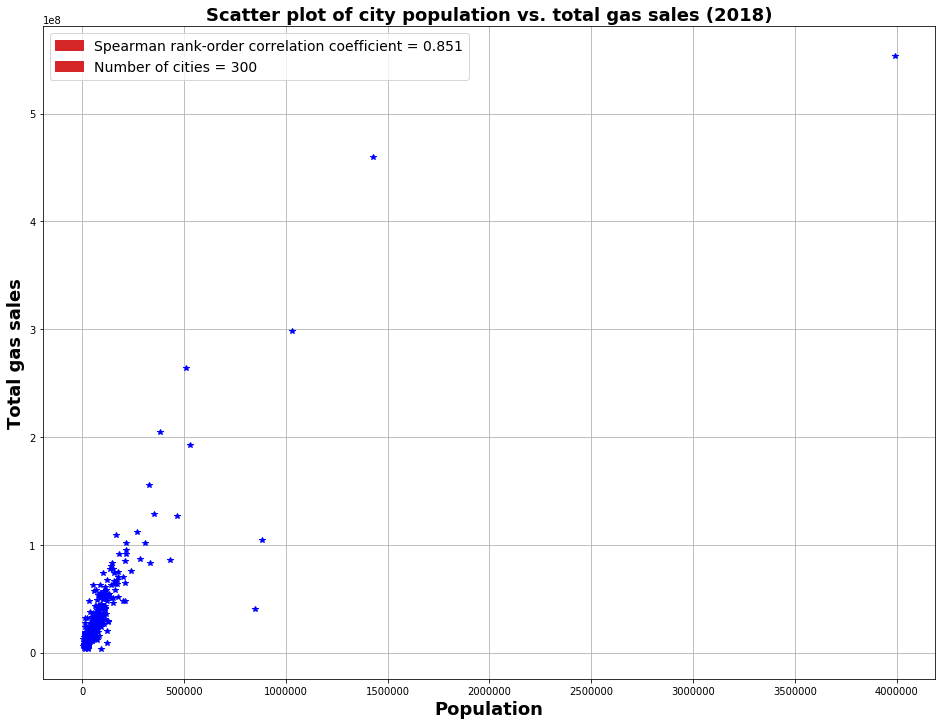

In [116]:
fig = plt.figure(figsize=(16,12))
plt.plot(dataAll["Population"].astype("int"),dataAll["Total Gasoline Sales.9"], "b*")
plt.grid(True)
plt.xlabel("Population",fontsize = 18, fontweight='bold')
plt.ylabel("Total gas sales", fontsize = 18, fontweight='bold')
plt.title("Scatter plot of city population vs. total gas sales (2018)",fontsize = 18, fontweight='bold')
red1 = mpatches.Patch(color='#d62728', label="Spearman rank-order correlation coefficient = " + '{:.3f}'.format(scipy.stats.spearmanr(dataAll["Population"].astype("int"),dataAll["Total Gasoline Sales.9"])[0]))
red2 = mpatches.Patch(color='#d62728', label="Number of cities = " + repr(dataAll.shape[0]))
plt.legend(handles=[red1,red2],loc=0,fontsize=14)
#plt.savefig("C:/Users/abazh/Desktop/meanReporting.png", dpu=300)
plt.show(fig)

We use a non-parametric method, namely the Spearman correlation coefficient, to quantify the relationship between the variables of interest. Thus, we do not rely on the assumption of normality in the distribution of the variables. 

We can clearly see that the population of the city is positively and highly correlated both with the number of reporting gas stations as well as the total gas sales. That means that larger cities tend to have more (reporting) gas stations and bigger consumption.

The relationship is stronger for the total gas sales indicating that it is a better proxy for city size compared to the number of reporting gas stations. Interestingly, the fluctuation in the number of reporting gas stations does not follow that close city size, i.e. there are cases of smaller cities presenting a high number of reporting gas stations (transit cities?) and bigger cities with a small number of reporting gas stations (remote cities?).

Whether this is some bias in the reporting needs to be further explored.

We also check how this correlation varies across years:

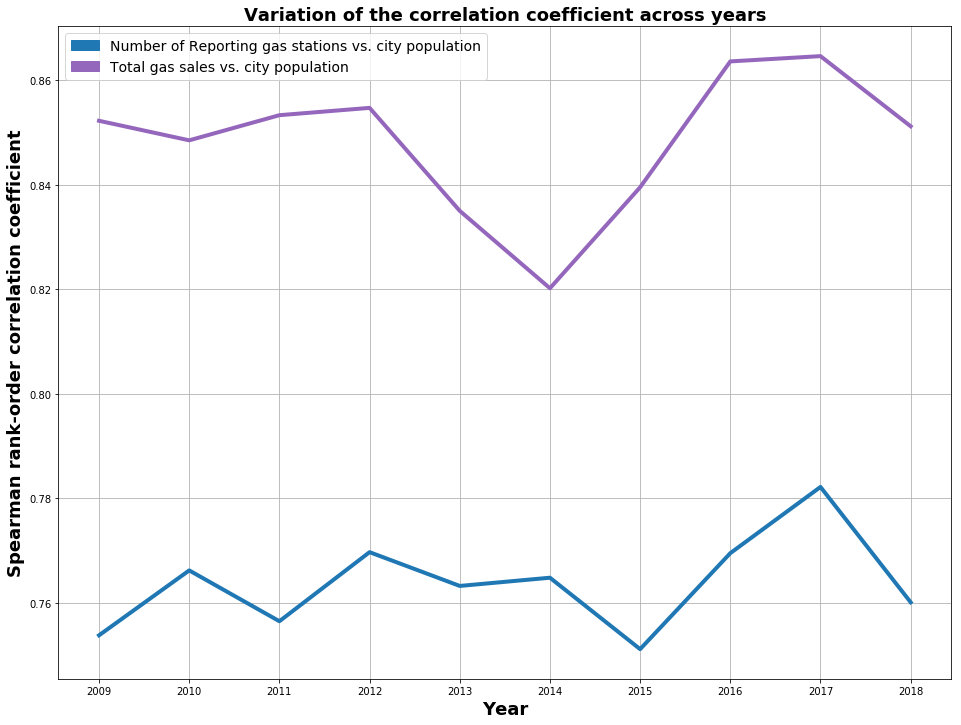

In [117]:
corrStations = []
corrGas = []

for i in range(len(gasNames)):
    corrStations.append(scipy.stats.spearmanr(dataAll["Population"].astype("int"),dataAll[stationNames[i]])[0])
    corrGas.append(scipy.stats.spearmanr(dataAll["Population"].astype("int"),dataAll[gasNames[i]])[0])

    
fig = plt.figure(figsize=(16,12))
plt.plot(corrStations, color = '#1f77b4', linewidth = 4)
plt.grid(True)
plt.plot(corrGas, color = '#9467bd', linewidth = 4)
plt.xlabel("Year",fontsize = 18, fontweight='bold')
pos = [0,1,2,3,4,5,6,7,8,9]
years = ["2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]
plt.xticks(pos, years)
plt.ylabel("Spearman rank-order correlation coefficient", fontsize = 18, fontweight='bold')
plt.title("Variation of the correlation coefficient across years",fontsize = 18, fontweight='bold')
red1 = mpatches.Patch(color='#1f77b4', label="Number of Reporting gas stations vs. city population")
red2 = mpatches.Patch(color='#9467bd', label="Total gas sales vs. city population")
plt.legend(handles=[red1, red2],loc=0,fontsize=14)
#plt.savefig("C:/Users/abazh/Desktop/meanReporting.png", dpu=300)
plt.show(fig)

The strength of the correlation remains pretty constant across years with the range of values within a 5% margin.

We now turn our attention to the "per capita income" and "Travel time to work" variables and explore their relationship with gas sales:

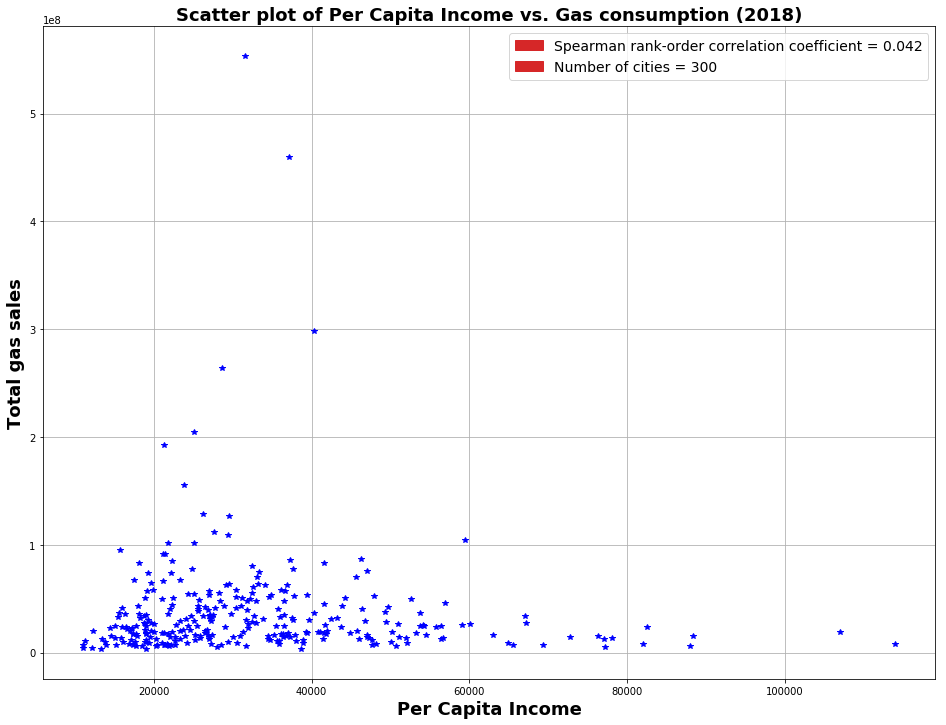

In [118]:
fig = plt.figure(figsize=(16,12))
plt.plot(dataAll["Per Capita Income"].astype("int"),dataAll["Total Gasoline Sales.9"], "b*")
plt.grid(True)
plt.xlabel("Per Capita Income",fontsize = 18, fontweight='bold')
plt.ylabel("Total gas sales", fontsize = 18, fontweight='bold')
plt.title("Scatter plot of Per Capita Income vs. Gas consumption (2018)",fontsize = 18, fontweight='bold')
red1 = mpatches.Patch(color='#d62728', label="Spearman rank-order correlation coefficient = " + '{:.3f}'.format(scipy.stats.spearmanr(dataAll["Per Capita Income"].astype("int"),dataAll["Total Gasoline Sales.9"])[0]))
red2 = mpatches.Patch(color='#d62728', label="Number of cities = " + repr(dataAll.shape[0])) 
plt.legend(handles=[red1,red2],loc=0,fontsize=14)
#plt.savefig("C:/Users/abazh/Desktop/meanReporting.png", dpu=300)
plt.show(fig)

The per capita income seems to be completely uncorrelated with total gas sales. In other words, poorer and wealthier cities seem to spend/consume the same amount of gas. 

Nevertheless, the above graph reveals a very interesting group of cities that can be considered as outliers, namely relatively poor cities with huge gas consumptions. We futher explore that group of cities:

In [173]:
dataNew = dataExtra.reset_index()
index = numpy.where(dataNew["Population"] == "x")[0]
dataNew = dataNew.drop(labels=index, axis=0)

index1 = numpy.where(dataNew["Per Capita Income"].astype("float") < 50000)[0]
index2 = numpy.where(dataNew[2018].astype("float") > 100000000)[0]
index = numpy.intersect1d(index1,index2)

dataNew.iloc[index]

,index,CITY,2014,2015,2016,2017,2018,EVSE Level 2,EV DC Fast,Population,Per Capita Income,Travel Time to Work
0,0,LOS ANGELES,458990063.0,489927305.0,577624448.0,602357350.0,553325286.0,2679.0,83.0,3990456,31563,30.9
1,1,SAN DIEGO,382951006.0,429738409.0,458149963.0,471779602.0,459943754.0,1416.0,129.0,1425976,37112,24
2,2,SAN JOSE,218224534.0,286512916.0,324059453.0,318609135.0,298578643.0,801.0,117.0,1030119,40275,29.4
3,3,SACRAMENTO,165447962.0,255968575.0,278560889.0,280524058.0,264019029.0,505.0,94.0,508529,28671,25.4
4,4,BAKERSFIELD,163316546.0,181022100.0,221473122.0,216668139.0,204619282.0,36.0,20.0,383579,25044,22.6
5,5,FRESNO,121137057.0,153759361.0,184727100.0,193446892.0,192385181.0,186.0,25.0,530093,21286,21.6
6,6,RIVERSIDE,107917738.0,127251421.0,146745932.0,146802350.0,155558036.0,161.0,34.0,330063,23865,30.4
7,7,LONG BEACH,117687506.0,120041337.0,129629841.0,130015569.0,126595389.0,236.0,4.0,467354,29586,30.4
8,8,ANAHEIM,95372914.0,114603756.0,136457019.0,138801314.0,128541952.0,265.0,30.0,352005,26185,28.5
10,10,CORONA,102155511.0,110546720.0,111948374.0,112897625.0,109554716.0,38.0,32.0,168819,29363,36.7


The above group of 14 cities correspond to cities with a per-capita-income below 41K and, at the same time, total gas sales above 100M gallons.

The biggest in population cities appear at the beginning followed by some smaller cities with extremely high gas consumptions. What is the common thread that connects all these cities? We don't believe there is a unique explanation. We can identify cities that are popular touristic attractions (casinos, resorts, arenas, etc.) and also some transit cities that act like hubs on central highways due to California's geography. A further investifation in a case-by-case basis is needed.

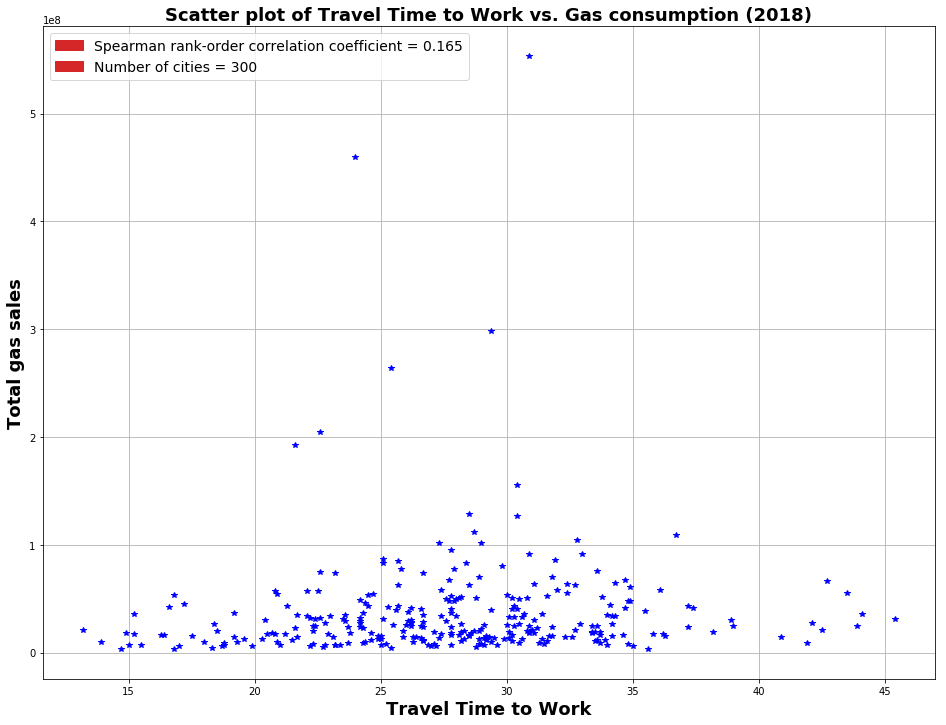

In [119]:
fig = plt.figure(figsize=(16,12))
plt.plot(dataAll["Travel Time to Work"].astype("float"),dataAll["Total Gasoline Sales.9"], "b*")
plt.grid(True)
plt.xlabel("Travel Time to Work",fontsize = 18, fontweight='bold')
plt.ylabel("Total gas sales", fontsize = 18, fontweight='bold')
plt.title("Scatter plot of Travel Time to Work vs. Gas consumption (2018)",fontsize = 18, fontweight='bold')
red1 = mpatches.Patch(color='#d62728', label="Spearman rank-order correlation coefficient = " + '{:.3f}'.format(scipy.stats.spearmanr(dataAll["Travel Time to Work"].astype("float"),dataAll["Total Gasoline Sales.9"])[0]))
red2 = mpatches.Patch(color='#d62728', label="Number of cities = " + repr(dataAll.shape[0])) 
plt.legend(handles=[red1,red2],loc=0,fontsize=14)
#plt.savefig("C:/Users/abazh/Desktop/meanReporting.png", dpu=300)
plt.show(fig)

Again, travel time to work seems to be fairly uncorrelated to gas consumption. Lower gas sales are observed for very low or very high travelling times, whereas most cities are located in the middle portion of the graph. If we color the dots based on city population, we get the following graph: 

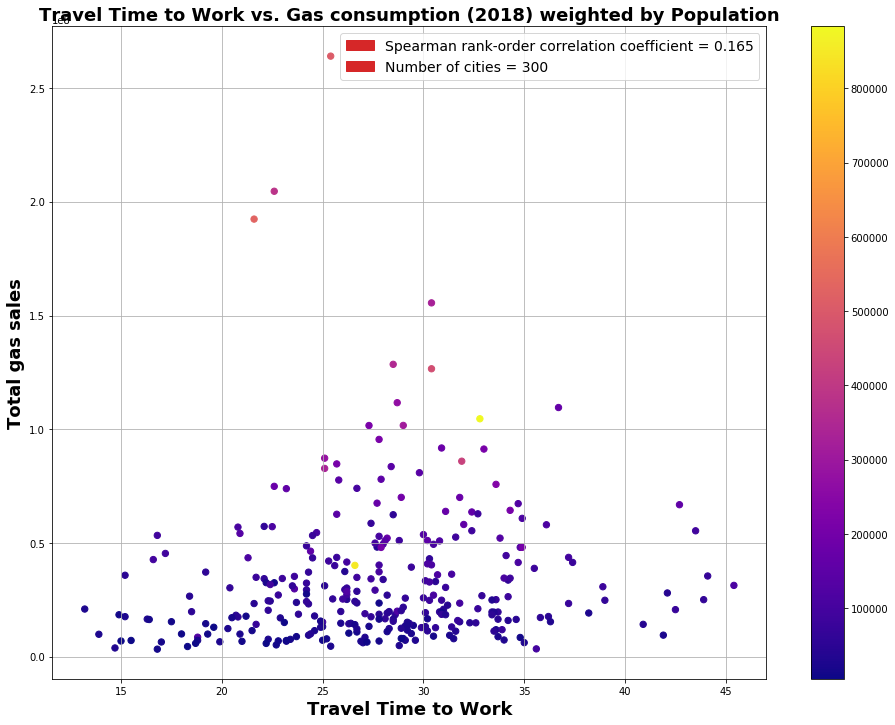

In [195]:
dataNew = dataAll.drop(labels=[0,1,2],axis=0)

fig = plt.figure(figsize=(16,12))
plt.scatter(dataNew["Travel Time to Work"].astype("float"),dataNew["Total Gasoline Sales.9"], c=dataNew["Population"].astype("float"), s=40, cmap='plasma')
plt.grid(True)
plt.xlabel("Travel Time to Work",fontsize = 18, fontweight='bold')
plt.ylabel("Total gas sales", fontsize = 18, fontweight='bold')
plt.title("Travel Time to Work vs. Gas consumption (2018) weighted by Population",fontsize = 18, fontweight='bold')
red1 = mpatches.Patch(color='#d62728', label="Spearman rank-order correlation coefficient = " + '{:.3f}'.format(scipy.stats.spearmanr(dataAll["Travel Time to Work"].astype("float"),dataAll["Total Gasoline Sales.9"])[0]))
red2 = mpatches.Patch(color='#d62728', label="Number of cities = " + repr(dataAll.shape[0])) 
plt.legend(handles=[red1,red2],loc=0,fontsize=14)
plt.colorbar()
#plt.savefig("C:/Users/abazh/Desktop/meanReporting.png", dpu=300)
plt.show(fig)

Bigger cities have higher gas sales as we showed above and mostly correspond to intermediate travel-time-to-work values.

The existence of EV charging stations seems to be driven by population. Bigger cities tend to have a higher number of EV stations as well as gas stations.

We finally fit a linear model to predict gas sales from all the available predictors. We first build a correlation table in order to identify  (and possibly exclude) any highly correlated variables:

In [191]:
dataAll[["Population","Total Stations Reported.9","EVSE Level 2","EV DC Fast","Per Capita Income","Travel Time to Work"]].astype("float").corr(method="spearman")


,Population,Total Stations Reported.9,EVSE Level 2,EV DC Fast,Per Capita Income,Travel Time to Work
Population,1.000000,0.760116,0.562636,0.482025,0.098183,0.281149
Total Stations Reported.9,0.760116,1.000000,0.468101,0.457831,-0.122945,-0.034038
EVSE Level 2,0.562636,0.468101,1.000000,0.603250,0.427048,0.069671
EV DC Fast,0.482025,0.457831,0.603250,1.000000,0.296437,0.066967
Per Capita Income,0.098183,-0.122945,0.427048,0.296437,1.000000,0.159098
Travel Time to Work,0.281149,-0.034038,0.069671,0.066967,0.159098,1.000000


The number of reporting stations and population are highly correlated, as we showed above, with all the other variables being somewhat correlated. However, nothing exceeds the (arbitrary) limit of 0.9 so we retain all predictors in the model.

we now fit the linear regression model:

In [197]:
y = dataAll["Total Gasoline Sales.9"].astype("float")
X = dataAll[["Population","Total Stations Reported.9","EVSE Level 2","EV DC Fast","Per Capita Income","Travel Time to Work"]].astype("float")
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(disp=0)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Gasoline Sales.9   R-squared:                       0.958
Model:                                OLS   Adj. R-squared:                  0.957
Method:                     Least Squares   F-statistic:                     1103.
Date:                    Wed, 15 Jan 2020   Prob (F-statistic):          7.97e-198
Time:                            11:15:17   Log-Likelihood:                -5281.5
No. Observations:                     300   AIC:                         1.058e+04
Df Residuals:                         293   BIC:                         1.060e+04
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -1.37e+07   3.37e+06     -4.068      0.000   -2.03e+07   -7.07e+06
Population                   10.0581      7.355      1.368      0.173      -4.417      24.534
Total Stations Reported.9  1.421e+06   4.57e+04     31.137      0.000    1.33e+06    1.51e+06
EVSE Level 2               2.086e+04   8676.407      2.405      0.017    3788.797    3.79e+04
EV DC Fast                 2.568e+05   5.67e+04      4.530      0.000    1.45e+05    3.68e+05
Per Capita Income           -34.4848     42.483     -0.812      0.418    -118.096      49.126
Travel Time to Work        5.968e+05   1.12e+05      5.342      0.000    3.77e+05    8.17e+05
==============================================================================
Omnibus:                       22.093   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.024
Skew:                           0.352   Prob(JB):                     2.26e-11
Kurtosis:                       4.851   Cond. No.                     1.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The Population variable in the presence of reporting stations becomes insignificant, as expected. Intriguingly, EV stations of both types are significant and, thus, convey extra information about the total gas sales in each city. However, their coefficients are positive which indicates that they are probably driven by population; bigger cities tend to have more gas consumption and more EV charging stations at the same time.

# Future work

1) We need the number of "vanishing" (closing) gas stations per city in order to test anything related to "less gas stations".

2) A grouping based on spatial distribution of the cities probably needs to be employed. 

3) Do we have gas price data available?

4) We can test formally for causal mechanisms/mediation mechanisms between variables either with a cascade of nested regression models or with structural equations.